<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizaciones con [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) y [Seaborn](https://seaborn.pydata.org/)



- Librería pandas.
- Revisaremos gráficos.
- Warnings.
- `subplots` para hacer varios gráficos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ancho = 12 pulgadas
# Largo = 6 pulgadas
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Google Auth
from google.colab import auth
auth.authenticate_user()


# API Client
from google.auth import default
creds, _ = default()


# gspread Authorization
import gspread
gc = gspread.authorize(creds)


In [6]:
# Accediendo al Google Sheet
url_ComputerBook = "https://docs.google.com/spreadsheets/d/1GnqMfa7tQHK-mHarPUT38xTMQw9ZOtDMbYGoD4nF-B4/edit?usp=sharing"
gsheets = gc.open_by_url(url_ComputerBook)
df = gsheets.worksheet("ComputerBook").get_all_values()


In [ ]:
print(df)

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


In [ ]:
df.iloc[[0, 1, 260, 270]]

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
260,3.45,1,3D Game Engine Design: A Practical Approach to...,A major revision of the international bestsell...,1040,Hardcover,117.988235
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


In [ ]:
df.describe()

,Rating,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000,271.000000
mean,4.067417,185.557196,475.077491,54.541860
std,0.290749,552.122252,306.147492,35.711485
min,3.000000,0.000000,50.000000,9.323529
25%,3.915000,5.500000,289.000000,30.751471
50%,4.100000,35.000000,384.000000,46.317647
75%,4.250000,116.500000,572.500000,67.854412
max,5.000000,5938.000000,3168.000000,235.650000


In [ ]:
# Información computacional del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    int64  
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 14.9+ KB


Eliminar columnas del dataset:
- El comando `del` para eliminar la columna no deseada.
- Seleccionar las columnas que queremos mantener.

In [ ]:
df_copy = df.copy()

del df_copy["Description"]
del df_copy["Number_Of_Pages"]
del df_copy["Type"]
df_copy.head()

,Rating,Reviews,Book_title,Price
0,4.17,3829,The Elements of Style,9.323529
1,4.01,1406,"The Information: A History, a Theory, a Flood",11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,11.267647
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,12.873529
4,4.06,1325,How Google Works,13.164706


In [ ]:
df_copy = df.copy()

columnas_que_queremos = ["Rating", "Reviews", "Book_title"]
df_copy = df_copy[columnas_que_queremos]
df_copy.head()

,Rating,Reviews,Book_title
0,4.17,3829,The Elements of Style
1,4.01,1406,"The Information: A History, a Theory, a Flood"
2,3.33,0,Responsive Web Design Overview For Beginners
3,3.97,1658,Ghost in the Wires: My Adventures as the World...
4,4.06,1325,How Google Works


Vamos a categorizar el _rating_ de cada libro.

In [ ]:
def CalificacionLibro(rating):
    if rating >= 4.5:
        return 'Muy buena'
    if rating >= 4:
        return 'Buena'
    if rating >= 3.5:
        return 'Normal'
    return 'Mala'

print(CalificacionLibro(1))
print(CalificacionLibro(5))

Mala
Muy buena


In [ ]:
df['Calificacion'] = df['Rating'].apply(CalificacionLibro)
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price,Calificacion
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529,Buena
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000,Buena
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647,Mala
3,3.97,1658,Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529,Normal
4,4.06,1325,How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706,Buena


# Gráfico de barra

El gráfico de barras clásico utiliza barras horizontales o verticales para mostrar **comparaciones entre categorías**. Un eje del gráfico muestra las categorías específicas que se comparan y el otro eje representa una escala de valores numéricos.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/graficos_de_barras.svg" width="550"/>

Para empezar, vamos a ver cuanto es el precio promedio (en dolares) de los libros separados según su calificación. Para esto, primero vamos a agrupar los datos por su calificación y para cada grupo, vamos a seleccionar la columna `Price` y calcular su promedio (`mean()`).

In [ ]:
precio_por_calificacion = df.groupby('Calificacion')['Price'].mean()

print(precio_por_calificacion)

Calificacion
Buena        54.025343
Mala         50.960695
Muy buena    58.243873
Normal       55.544662
Name: Price, dtype: float64


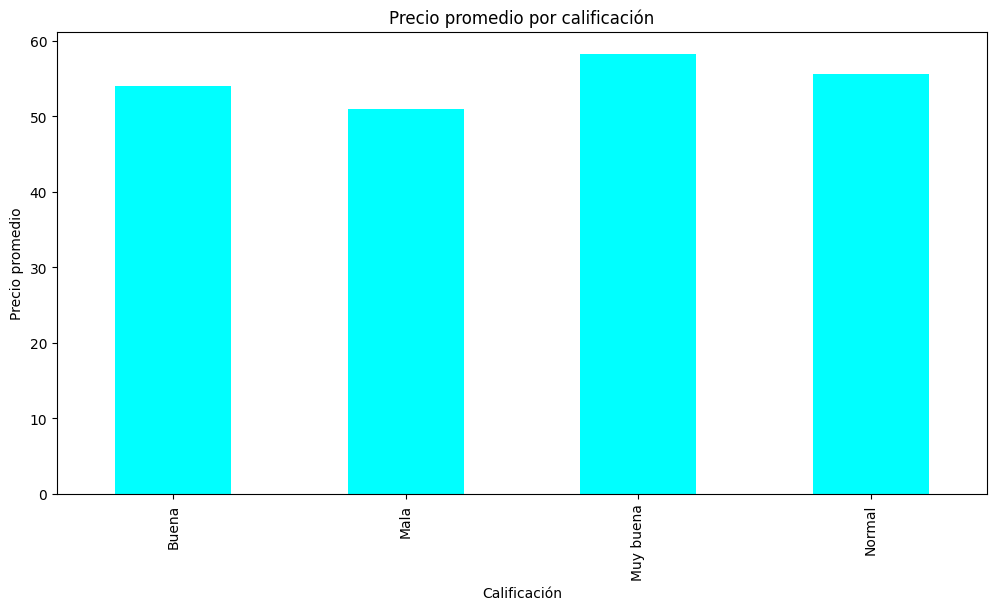

In [ ]:
precio_por_calificacion = df.groupby('Calificacion')['Price'].mean()

# Graficamos ahora el arreglo resultante
ax = precio_por_calificacion.plot.bar(
    color = 'cyan',
    title = 'Precio promedio por calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Precio promedio")

plt.show()

¿Que tal será el número de página promedio por calificación? ¿y si queremos un gráfico horizontal?

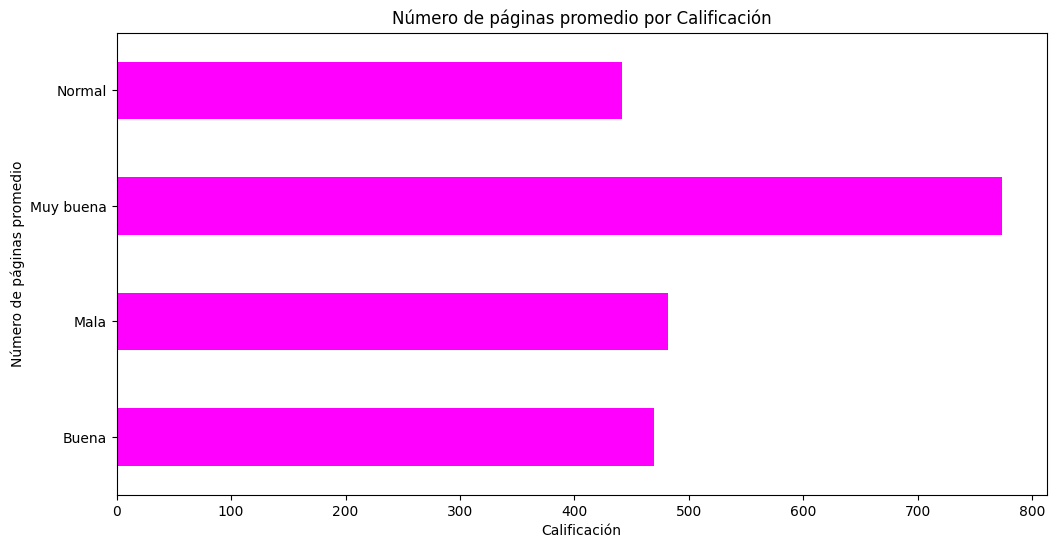

In [ ]:
numero_pagina_por_calificacion = df.groupby('Calificacion')['Number_Of_Pages'].mean()

ax = numero_pagina_por_calificacion.plot.barh(
    color = 'magenta',
    title = 'Número de páginas promedio por Calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Número de páginas promedio")

plt.show()

¿Y si queremos un gráfico ordenado? Entonces usamos la función `sort_values` para ordenar los datos.

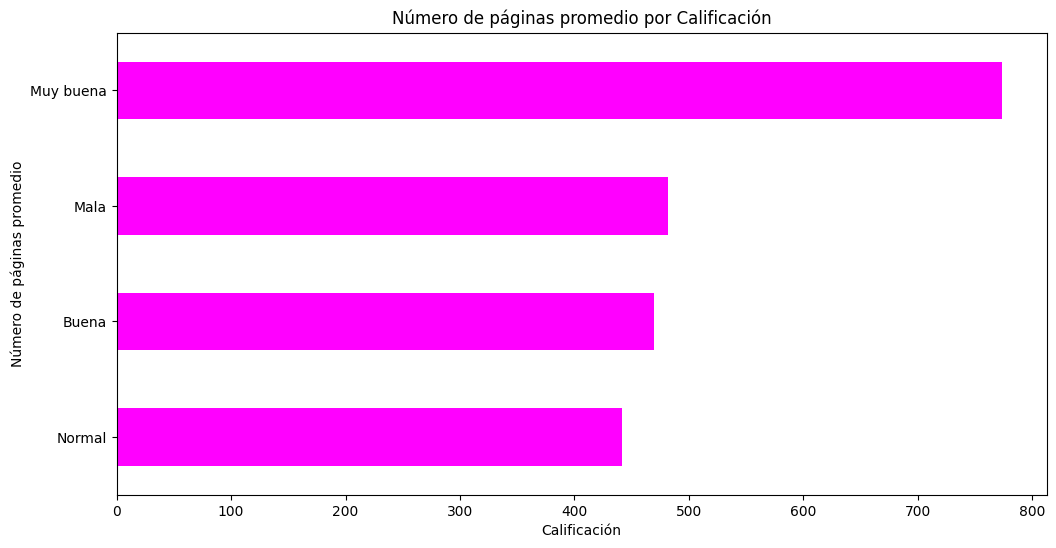

In [ ]:
numero_pagina_por_calificacion = df.groupby('Calificacion')['Number_Of_Pages'].mean()

numero_pagina_por_calificacion = numero_pagina_por_calificacion.sort_values()

ax = numero_pagina_por_calificacion.plot.barh(
    color = 'magenta',
    title = 'Número de páginas promedio por Calificación'
    )

ax.set_xlabel("Calificación")
ax.set_ylabel("Número de páginas promedio")

plt.show()

# Histograma

Un histograma visualiza la **distribución de los datos a lo largo de un intervalo**. Cada barra en un histograma representa la **frecuencia** en cada intervalo/bin. El área total del histograma es igual al número de datos. Si bien utiliza las mismas marcas que un gráfico de barra, la interpretación de su información será distinta.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/histograma.svg" width="550"/>

Lo primero que haremos es ver como distribuye la cantidad de hojas en los libros de computación. Para eso, ocupamos el comando `distplot`.


<ipython-input-17-b522bab45efb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Number_Of_Pages"])


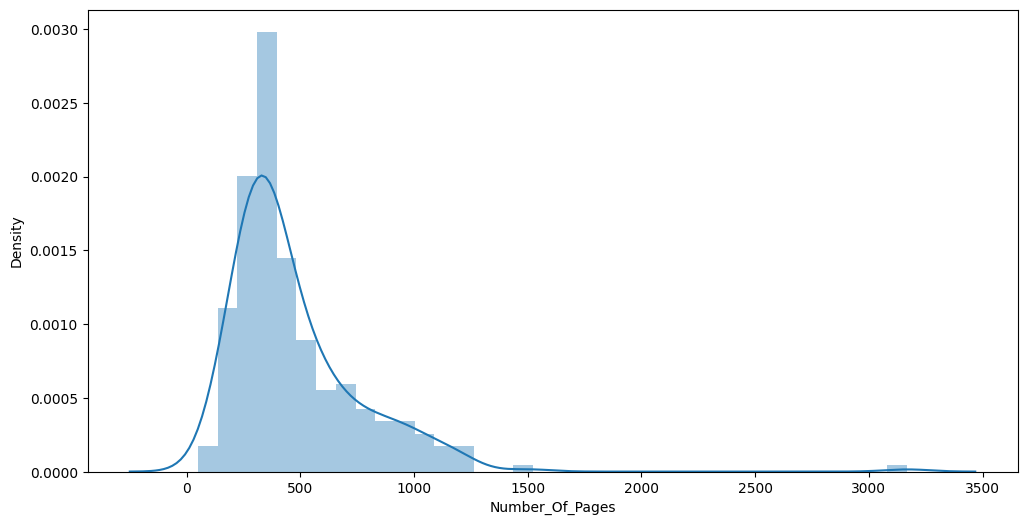

In [ ]:
ax = sns.distplot(df["Number_Of_Pages"])

### ⚠ Ojo nos aparece un _warning_
Esto nos indica que en las futuras versiones de la librería Seaborn, está función ya no estara disponible. Por ello, el mismo _warning_ nos sugiere cambiarlo por `displot` (antes era `distplot`) o `histplot`. En este caso usaremos el segundo.

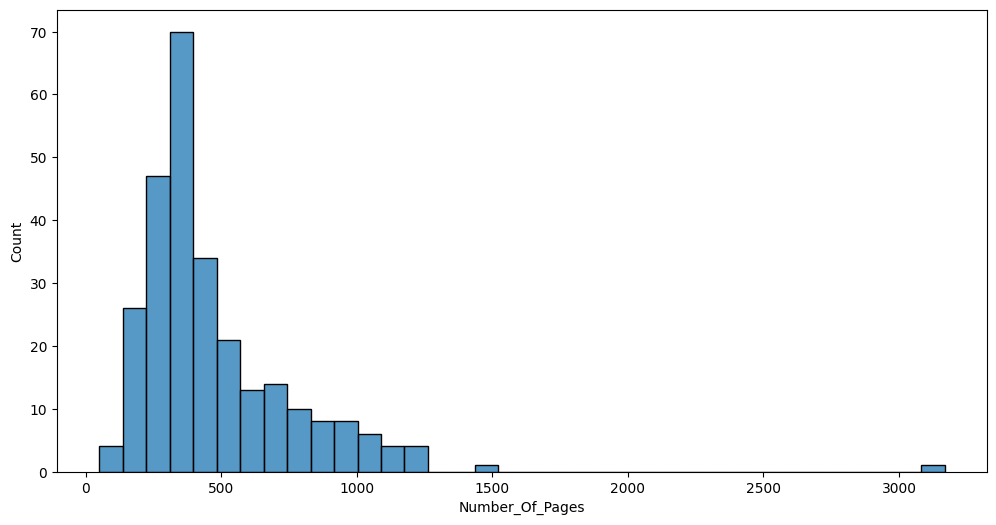

In [ ]:
ax = sns.histplot(df["Number_Of_Pages"])

Ahora, si queremos ver 2 histograma superpuestos, podemos llamar 2 veces a la función `histplot`.

<ipython-input-19-9b082dc09f38>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-19-9b082dc09f38>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


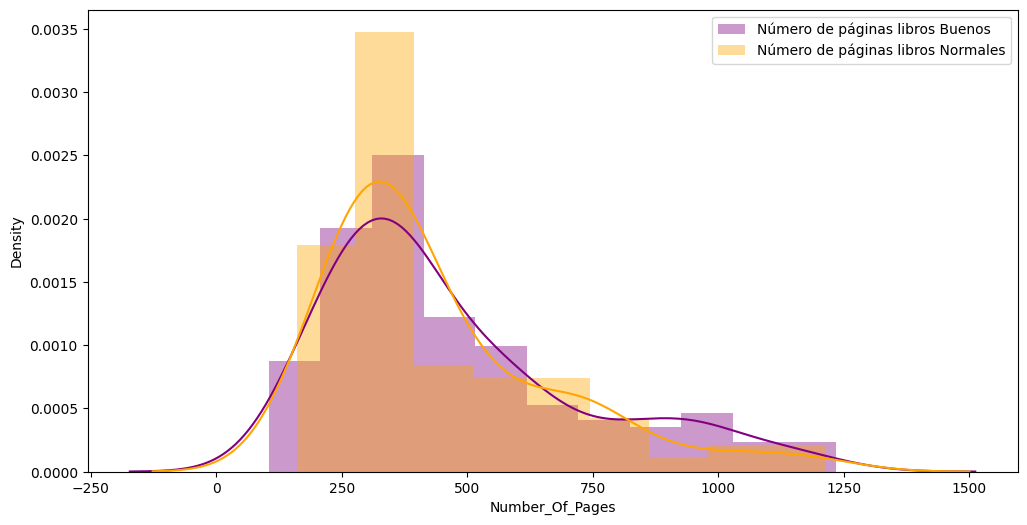

In [ ]:
# Ahora, por defecto ya no veremos la función de densidad de probabilidad.
# Si queremos agregarla, usamos el atributo kde = True.

sns.distplot(
    df[df.Calificacion == "Buena"].Number_Of_Pages,
    color="purple",
    label="Número de páginas libros Buenos"
    )
sns.distplot(
    df[df.Calificacion == "Normal"].Number_Of_Pages,
    color="orange",
    label="Número de páginas libros Normales"
    )

plt.legend()

plt.show()

# Gráfico de Caja

Un diagrama de cajas y bigotes es una manera conveniente de mostrar visualmente grupos de datos numéricos a través de sus cuartiles.

Las líneas que se extienden paralelas a las cajas se conocen como «bigotes», y se usan para indicar variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos se representan a veces como puntos individuales que están en línea con los bigotes. Los diagramas de cajas y bigotes se pueden dibujar vertical u horizontalmente.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/diagrama_cajas_y_bigotes.svg" width="550"/>

Anteriormente vismos como distribuye el precio en función de la frecuencia de datos. Ahora vamos a observar esa misma información pero con un gráfico de caja. Para esto, utilizamos la función `boxplot`.

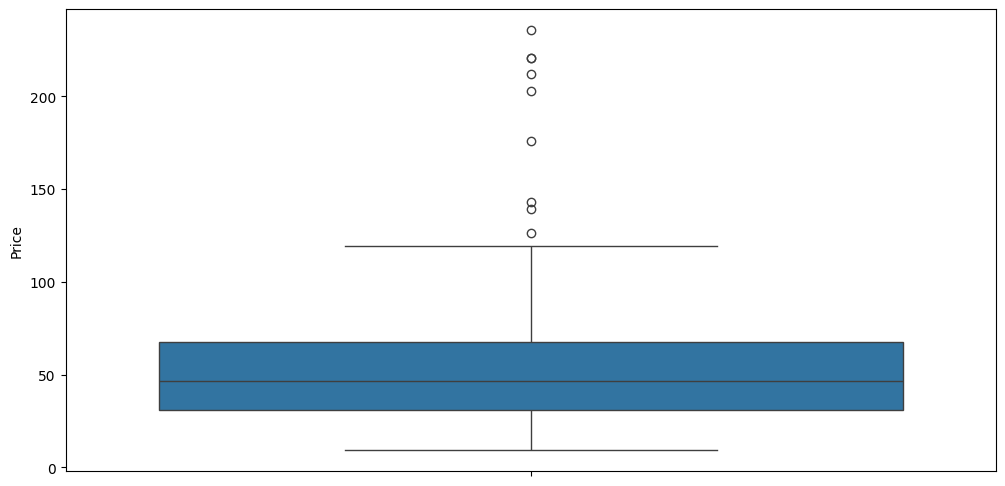

In [ ]:
# Veremos la distribución de la variable Price (precio en dolares) con un gráfico de caja.
ax = sns.boxplot(df.Price)

### ⚠_warning_
En las futuras versiones de la librería Seaborn, está función podría generar error o funcionar de otra forma.

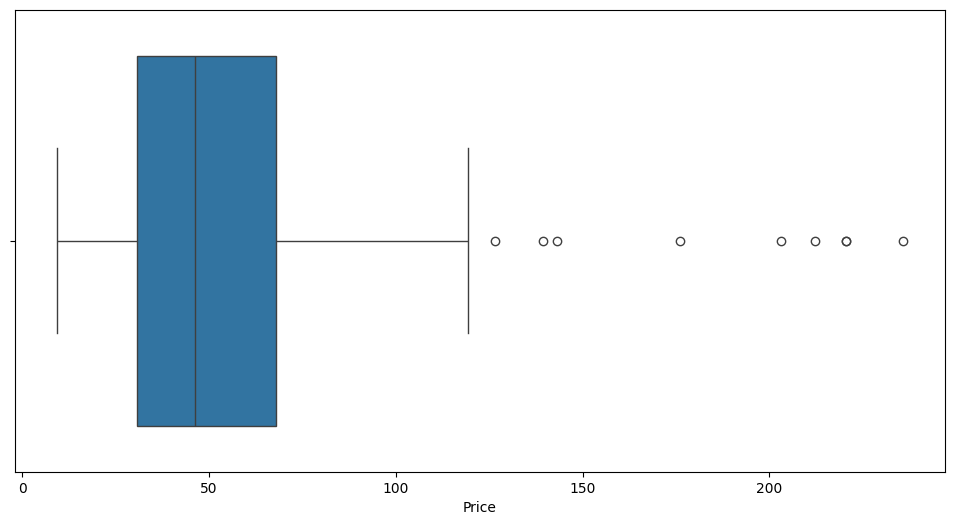

In [ ]:
ax = sns.boxplot(x=df.Price)

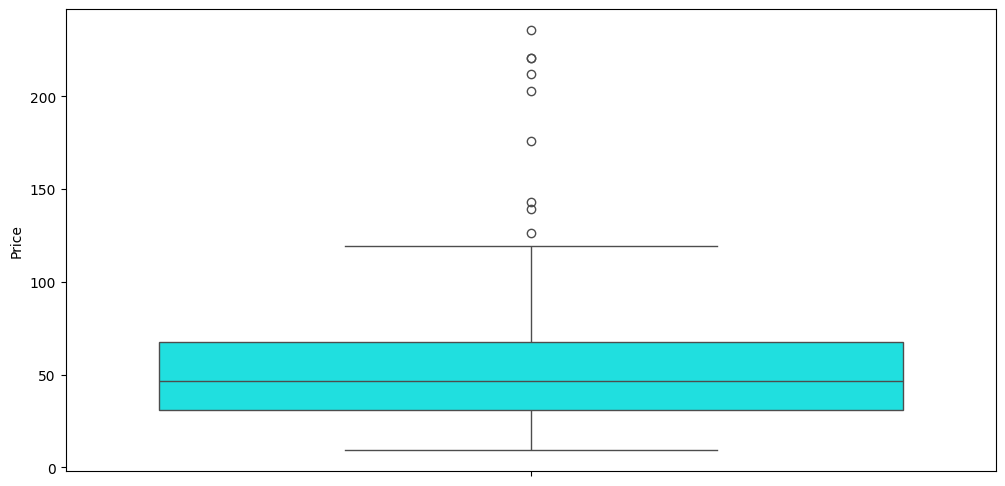

In [ ]:
ax = sns.boxplot(
    y=df.Price,
    color="Cyan"
    )

Utilizar otra paleta de colores para pintar las cajas. Para esto está el parámetro `palette` donde le damos algún valor de los que salen en el siguiente enlace: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<ipython-input-23-b8f821089744>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Type', ylabel='Price'>

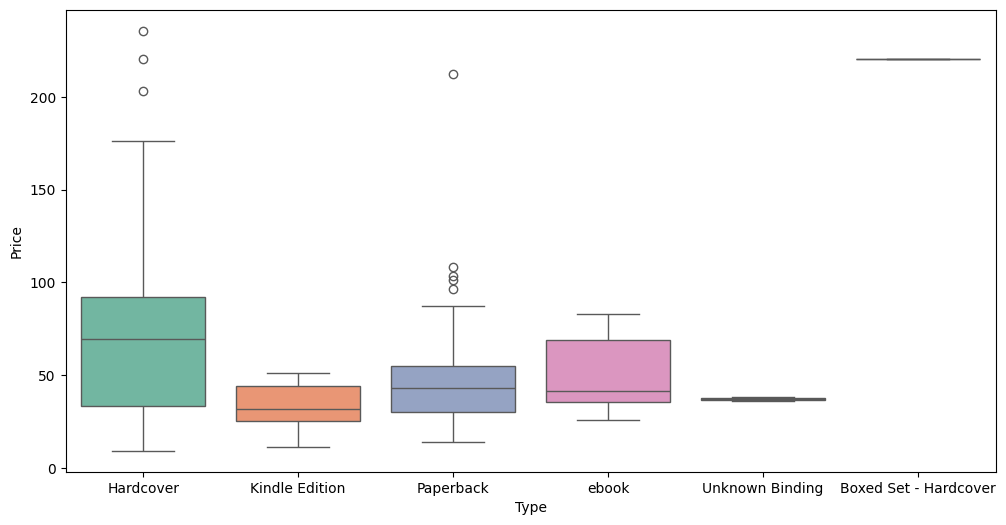

In [ ]:
sns.boxplot(
    x="Type",
    y="Price",
    data=df,
    palette="Set2"
    )

<ipython-input-24-77f09cdb128a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


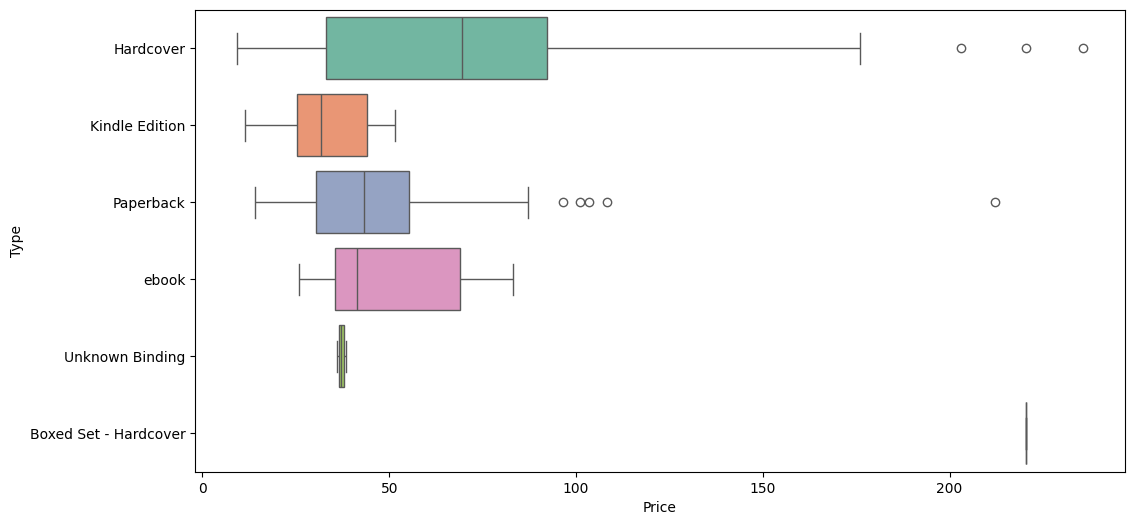

In [ ]:
# Antes - sns.boxplot(x="Type", y="Price", data=df, palette="Set2")
sns.boxplot(
    x="Price",
    y="Type",
    data=df,
    palette="Set2"
    )

plt.show()

# Gráfico de Violin

Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.

Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/diagrama_de_violin.svg" width="550"/>

La función para hacer este tipo de gráfico se llama `violinplot` y se ocupa **exactamente igual** al `boxplot`. Es decir, entregamos el dataset al parámetro `data`, e indicamos las columnas a ocupar con `x` e `y`.

<ipython-input-25-374ba388e7b4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='Price', ylabel='Type'>

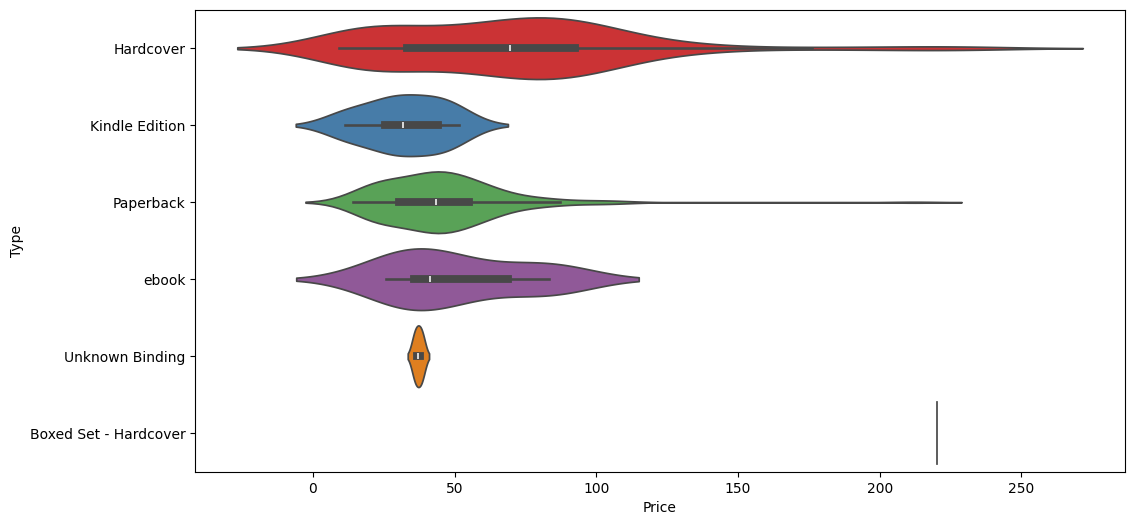

In [ ]:
sns.violinplot(
    x="Price",
    y="Type",
    data=df,
    palette="Set1"
    )

Si queremos ver solo 1 diagrama de violin, hacemos lo mismo que el caso del `boxplot`. Entregamos los datos que deseamos al parámetro `x` o `y`. Recodar que `y` se ocupa se queremos el gráfico vertical y `x` si lo queremos horizontal.

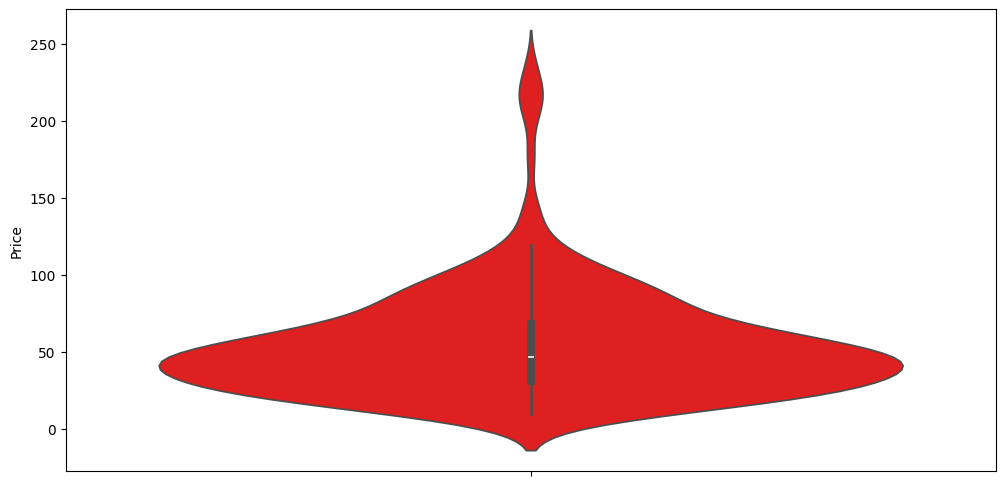

In [ ]:
sns.violinplot(
    y=df.Price,
    color="red"
    )

plt.show()

### Gráfico de Caja VS Gráfico de Violin



Text(0.5, 0.98, 'Boxplot VS Violinplot')

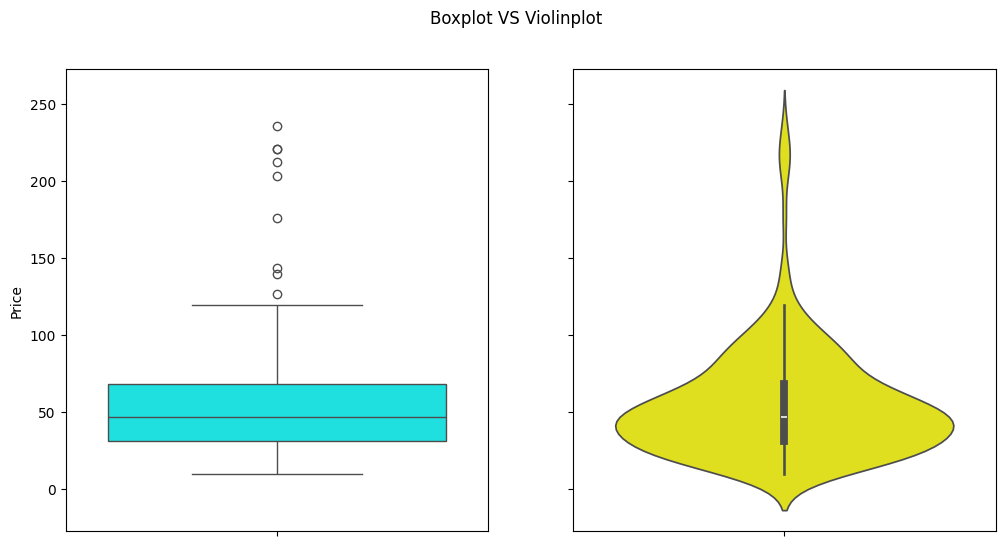

In [ ]:
fig, charts = plt.subplots(1,2, sharey=True)

sns.boxplot(y=df.Price, color="cyan", ax=charts[0])
sns.violinplot(y=df.Price, color="yellow", ax=charts[1])

fig.suptitle('Boxplot VS Violinplot')


![Gráfico de caja VS de torta](https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png)
Fuente: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

# Gráfico de Torta

 Cada longitud de arco representa una proporción de cada categoría, mientras que el círculo completo representa la suma total de todos los datos, igual al 100%. Es una visualización ideal para **presentar la proporcion de los datos** cuando tenemos **pocas categorías**.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/graficos_de_tarta.svg" width="550"/>



In [ ]:
calificacion_distribucion = df.groupby("Calificacion").size()
print(calificacion_distribucion)
print()

calificacion_distribucion = calificacion_distribucion / calificacion_distribucion.sum()
print(calificacion_distribucion)

Calificacion
Buena        167
Mala          11
Muy buena     12
Normal        81
dtype: int64

Calificacion
Buena        0.616236
Mala         0.040590
Muy buena    0.044280
Normal       0.298893
dtype: float64


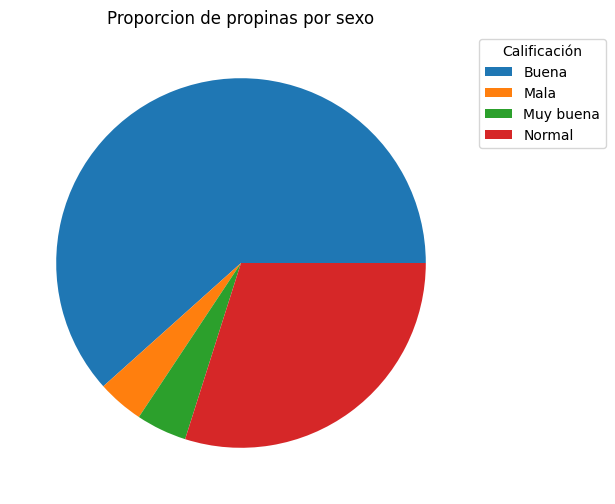

In [ ]:
pie_chart = plt.pie(calificacion_distribucion)

# Se agrega la leyenda en donde se le entrega la lista de cada segmento circular una lista de strings
# que será el nombre asignado a cada elemento y le damos un título a la leyenda
plt.legend(
    pie_chart[0],
    calificacion_distribucion.index,
    title="Calificación",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

#Se asigna un título al gráfico
plt.title("Proporcion de propinas por sexo")

plt.show()

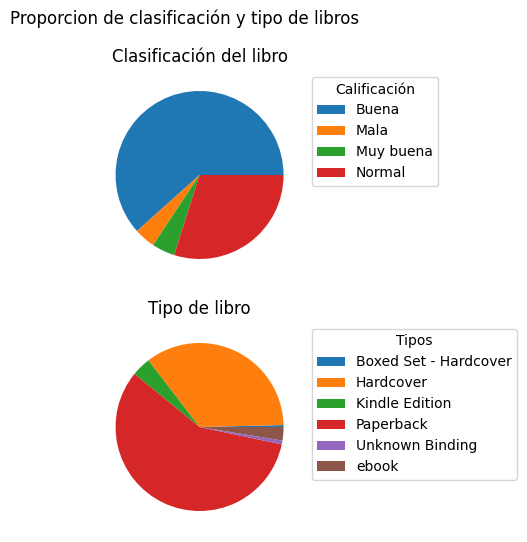

In [ ]:
calificacion_distribucion = df.groupby("Calificacion").size()
tipo_distribucion = df.groupby("Type").size()

fig, charts = plt.subplots(2,1)

# Definimos cada gráfico
charts[0].pie(calificacion_distribucion)
charts[1].pie(tipo_distribucion)

# Se agrega la leyenda a cada gráfico.
charts[0].legend(
    calificacion_distribucion.index,
    title="Calificación",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

charts[1].legend(
    tipo_distribucion.index,
    title="Tipos",
    loc='upper left',
    bbox_to_anchor=(1, 1)
    )

# Se asigna el título a cada sub-gráfico
charts[0].set_title("Clasificación del libro")
charts[1].set_title("Tipo de libro")

#Se asigna un título al gráfico
fig.suptitle("Proporcion de clasificación y tipo de libros")


plt.show()

# Pequeños Multiples

Este gráfico, tambien llamado: _trellis chart_, _lattice chart_, _grid chart_ o _panel chart_ consiste en una serie o cuadrícula de pequeños gráficos **todos con la misma codificación** , lo que permite **compararlos** fácilmente y **no comparten datos**.

Comparar la cantidad de libros que tenemos por tipo, pero separados según la cantidad de comentarios que tienen los libro. De esta forma, podemos ver si los libros muy comentados tiene un comportamiento distinto a los que tienen muy pocos comentarios.

In [ ]:
def Comentado(reviews):
    if reviews >= 600:
        return "Demasiado"
    if reviews >= 50:
        return "Lo esperado"
    return "Casi Nada"

In [ ]:
df_2 = df.copy()
df_2["Comentado"] = df_2["Reviews"].apply(Comentado)
df_agrupado_2 = df_2.groupby(["Type", "Comentado"]).size()
df_agrupado_2

Type                   Comentado  
Boxed Set - Hardcover  Casi Nada       1
Hardcover              Casi Nada      58
                       Demasiado      10
                       Lo esperado    27
Kindle Edition         Casi Nada       6
                       Demasiado       1
                       Lo esperado     3
Paperback              Casi Nada      87
                       Demasiado       5
                       Lo esperado    64
Unknown Binding        Lo esperado     2
ebook                  Casi Nada       4
                       Lo esperado     3
dtype: int64

In [ ]:
df_agrupado_2 = df_agrupado_2.reset_index()
print(df_agrupado_2.columns)

# Cambiar nombre
df_agrupado_2.columns = ["Type", "Comentado", "Cantidad"]

# Ver como queda ahora
df_agrupado_2

Index(['Type', 'Comentado', 0], dtype='object')


,Type,Comentado,Cantidad
0,Boxed Set - Hardcover,Casi Nada,1
1,Hardcover,Casi Nada,58
2,Hardcover,Demasiado,10
3,Hardcover,Lo esperado,27
4,Kindle Edition,Casi Nada,6
5,Kindle Edition,Demasiado,1
6,Kindle Edition,Lo esperado,3
7,Paperback,Casi Nada,87
8,Paperback,Demasiado,5
9,Paperback,Lo esperado,64


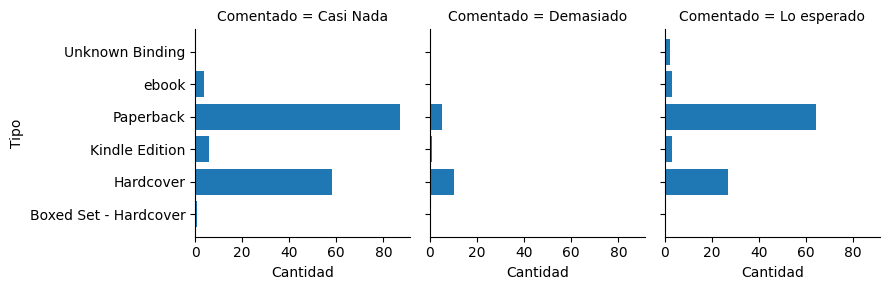

In [ ]:
# función  genera los gráficos sin datos
grid = sns.FacetGrid(
    data=df_agrupado_2,
    col="Comentado",
    col_wrap=3
    )

grid.map(plt.barh, "Type", "Cantidad")

grid.set_axis_labels("Cantidad", "Tipo")

plt.show()

¿Cómo hago si quiero ver las columnas con un cierto orden? Agregamos `col_order`.

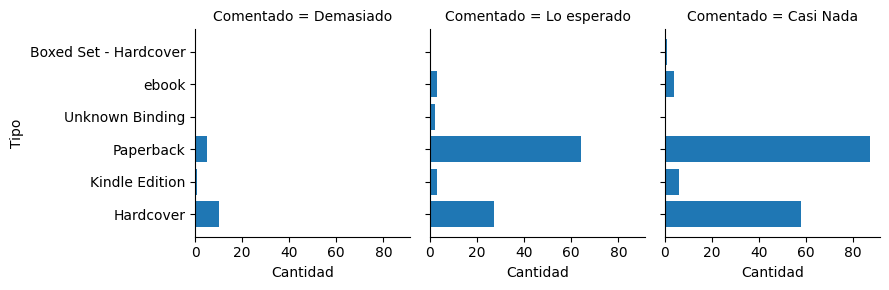

In [ ]:
grid = sns.FacetGrid(
    data=df_agrupado_2,
    col="Comentado",
    col_wrap=3,
    col_order=["Demasiado", "Lo esperado", "Casi Nada"]
    )

grid.map(plt.barh, "Type", "Cantidad")

grid.set_axis_labels("Cantidad", "Tipo")

plt.show()

# Mapa de calor

Los mapas de calor consisten en generar una grilla donde cada fila y columna es un valor distinto de dos columnas del dataset y cada celda codifica, través de variaciones en el color, un valor numérico.

<img src="https://datavizcatalogue.com/ES/metodos/images/top_images/SVG/mapa_de_calor.svg" width="550"/>


Para este último gráfico, vamos a intentar ver un resumen de la cantidad de comentarios que tienen los libros según el tipo y calificación. ¿Será posible ver que hay libros con muy pocos comentarios pero son muy buenos?

In [ ]:
df_agrupado = df.groupby(["Type", "Calificacion"])["Reviews"].mean()
df_agrupado

Type                   Calificacion
Boxed Set - Hardcover  Buena            36.000000
Hardcover              Buena           359.237288
                       Mala              1.000000
                       Muy buena        28.000000
                       Normal          270.687500
Kindle Edition         Buena           250.833333
                       Mala              0.000000
                       Normal           20.000000
Paperback              Buena           159.168421
                       Mala              1.222222
                       Muy buena        99.250000
                       Normal           50.227273
Unknown Binding        Buena           125.000000
                       Normal          122.000000
ebook                  Buena            60.600000
                       Muy buena         0.000000
                       Normal           57.000000
Name: Reviews, dtype: float64

In [ ]:
df_agrupado_sin_index = df_agrupado.reset_index()
df_agrupado_sin_index.head()

,Type,Calificacion,Reviews
0,Boxed Set - Hardcover,Buena,36.000000
1,Hardcover,Buena,359.237288
2,Hardcover,Mala,1.000000
3,Hardcover,Muy buena,28.000000
4,Hardcover,Normal,270.687500


Ahora usamos la función `pivot` que nos permite generar una matriz donde:

1.  Cada fila serán los valores distinto de la columna indicada (`Type`).
1.  Cada columna serán los valores distinto de la columna indicada (`Calificacion`).
1.  Cada celda será el valor numérico de la columna `Reviews` asociado a la fila y columna que corresponda.

In [ ]:
df_pivoteado = df_agrupado_sin_index.pivot(index="Type", columns="Calificacion", values="Reviews")
df_pivoteado

Calificacion,Buena,Mala,Muy buena,Normal
Type,,,,
Boxed Set - Hardcover,36.000000,NaN,NaN,NaN
Hardcover,359.237288,1.000000,28.00,270.687500
Kindle Edition,250.833333,0.000000,NaN,20.000000
Paperback,159.168421,1.222222,99.25,50.227273
Unknown Binding,125.000000,NaN,NaN,122.000000
ebook,60.600000,NaN,0.00,57.000000


In [ ]:
df_pivoteado.fillna(0, inplace=True)
df_pivoteado

Calificacion,Buena,Mala,Muy buena,Normal
Type,,,,
Boxed Set - Hardcover,36.000000,0.000000,0.00,0.000000
Hardcover,359.237288,1.000000,28.00,270.687500
Kindle Edition,250.833333,0.000000,0.00,20.000000
Paperback,159.168421,1.222222,99.25,50.227273
Unknown Binding,125.000000,0.000000,0.00,122.000000
ebook,60.600000,0.000000,0.00,57.000000


Ahora usamos la función `heatmap` de seaborn para construir el gráfico.

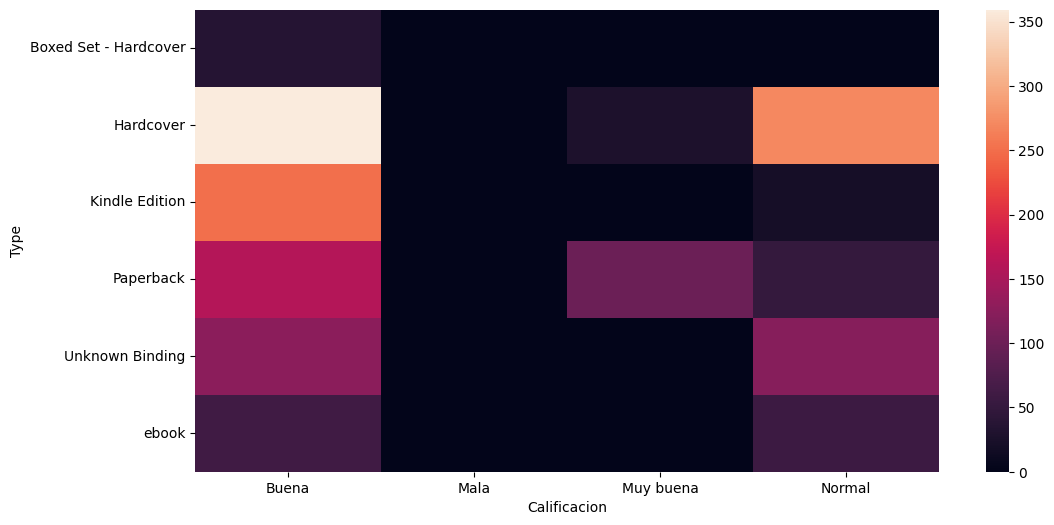

In [ ]:
ax = sns.heatmap(df_pivoteado)

<Axes: xlabel='Calificacion', ylabel='Type'>

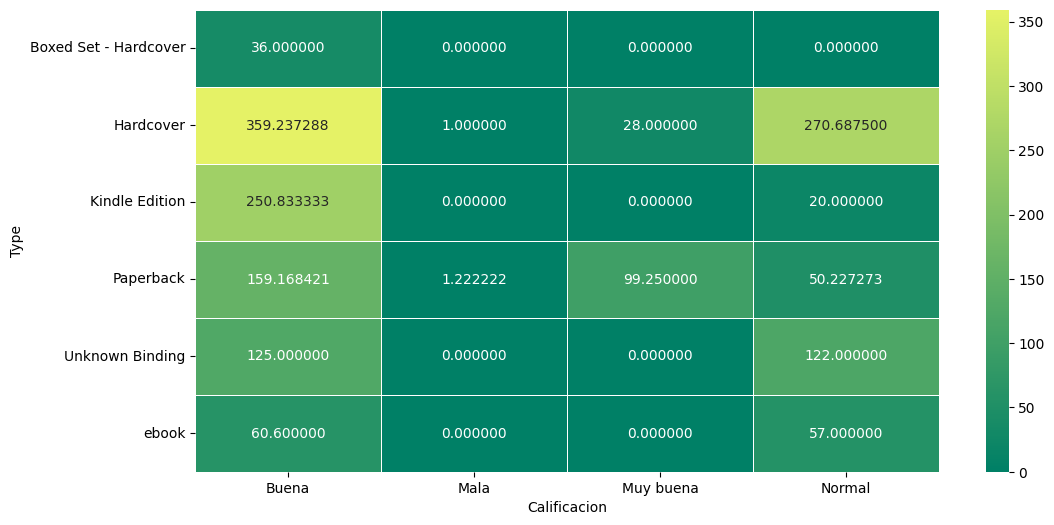

In [ ]:
sns.heatmap(
    df_pivoteado,
    annot=True,
    fmt="f",
    annot_kws={'size': 10},
    cmap='summer', # coolwarm
    linewidths=.5,
    center=200
    )

# Documentación
- Pandas: [pandas.pydata.org](https://pandas.pydata.org/docs/reference/index.html)
- Matplotlib.pyplot: [matplotlib.org](https://matplotlib.org/stable/api/pyplot_summary.html)
- Seaborn: [seaborn.pydata.org](https://seaborn.pydata.org/api.html)

# Referencias
* _Catálogo de Visualización de Datos_. (n.d.). Catálogo de Visualización de Datos. Obtenido el 12 de abril, 2021, de https://datavizcatalogue.com/ES/
